In [1]:
%matplotlib inline
from fastai.imports import *
from sklearn.ensemble import RandomForestRegressor

Start by using *linspace* to create evenly spaced data between 2 points. We are trying to create a synthetic linear timeseries 

In [2]:
x = np.linspace(0,1);x

array([0.     , 0.02041, 0.04082, 0.06122, 0.08163, 0.10204, 0.12245, 0.14286, 0.16327, 0.18367, 0.20408,
       0.22449, 0.2449 , 0.26531, 0.28571, 0.30612, 0.32653, 0.34694, 0.36735, 0.38776, 0.40816, 0.42857,
       0.44898, 0.46939, 0.4898 , 0.5102 , 0.53061, 0.55102, 0.57143, 0.59184, 0.61224, 0.63265, 0.65306,
       0.67347, 0.69388, 0.71429, 0.73469, 0.7551 , 0.77551, 0.79592, 0.81633, 0.83673, 0.85714, 0.87755,
       0.89796, 0.91837, 0.93878, 0.95918, 0.97959, 1.     ])

Create a dependent variable y with a little bit of randomness to it. The random numbers should be the same shape as x.

In [5]:
y = x + np.random.uniform(-0.2, 0.2, x.shape);y

array([-0.11723, -0.17867, -0.11082,  0.18561,  0.27885,  0.25236, -0.0747 ,  0.09954,  0.09189,  0.09996,
        0.0652 ,  0.02892,  0.16266,  0.39749,  0.25835,  0.15938,  0.16603,  0.23502,  0.2476 ,  0.49143,
        0.28412,  0.34637,  0.4437 ,  0.64117,  0.63653,  0.67607,  0.69985,  0.44712,  0.38056,  0.45112,
        0.5737 ,  0.47683,  0.64547,  0.61885,  0.60156,  0.65256,  0.74835,  0.89823,  0.96142,  0.81316,
        0.80887,  0.96265,  0.9918 ,  0.85253,  0.82381,  1.08704,  0.76742,  1.07436,  0.80721,  0.93221])

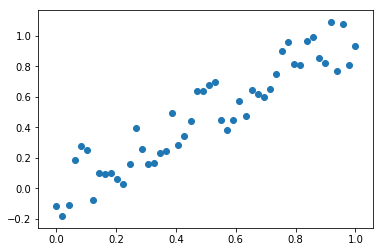

In [6]:
plt.scatter(x,y)

Treat the dataset as timeseries. Take the earlier data as the training set and the recent data as validation set.

 Create a random forest and fit it. The x is in the form of a vector and the tree will expect a matrix. Looking at x.shape will show `(50,)` which means it has one **axis**, it **rank** is one. 
 
 Rank of a variable is equal to the lenth of its shape `rank - len(x.shape)`
 
 Vector is an array of rank 1 and a matrix is an array of rank 2
 
*How do we turn a 1 dimensional array into a 2 dimensional array?*
You can use none to introduce a new unit axis.

Notes:
* `x[None,:` is the same as . `x[None]`
* `x[...,None]` fill as many as you need to

In [15]:
print(f'1 row and 50 columns {x[None,:].shape}')
print(f'50 rows and 1 column {x[:, None].shape}')

1 row and 50 columns (1, 50)
50 rows and 1 column (50, 1)


In [20]:
x1 = x[..., None]
#[:40] 0->40 [40:] 40 -> end
x_trn, x_val = x1[:40], x1[40:]
y_trn, y_val = y[:40], y[40:]

m = RandomForestRegressor().fit(x_trn,y_trn)

Plotting y_trn against the prediction of x_trn should look the same as the original dataset since we expect the predection of x_trn to be close to x_trn

In [23]:
??plt.scatter

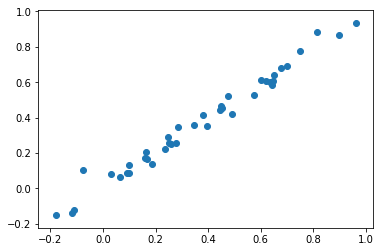

In [25]:
plt.scatter(y_trn, m.predict(x_trn))

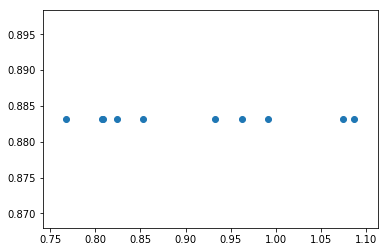

In [27]:
plt.scatter(y_val, m.predict(x_val))

This shows a limitation of the random forest, it can only predict averages based on what it has seen, so giving it a datapoint in time beyond what it has seen will result in it just predicting the average of the most recent leaf node it has. 

This results in all predictions beyond a time that it has seen to be the value of the most recent time datapoint used to train the tree. https://youtu.be/BFIYUvBRTpE?t=5850
